<a href="https://colab.research.google.com/github/Kolexx/Predicting-Customer-Churn-Identifying-Customers-that-are-Susceptible-to-Churn/blob/main/Predicting_Customer_Churn_Identifying_Customers_that_are_Susceptible_to_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from ast import literal_eval
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('Dataset.xlsx')
df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22


In [ ]:
df1 = df.isnull().sum()
df1

,0
CustomerID,0
Name,0
Age,0
Gender,0
Location,0
Email,0
Phone,0
Address,0
Segment,0
PurchaseHistory,0


In [ ]:
df.duplicated().any()

np.False_

In [ ]:
df[df.duplicated(keep=False)]


,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp


In [ ]:
df.describe()

,CustomerID,Age,NPS,ChurnLabel
count,12483.00000,12483.000000,12483.000000,12483.000000
mean,7242.00000,43.930065,2.973884,0.505808
std,3603.67604,15.341521,2.644623,0.499986
min,1001.00000,18.000000,0.000000,0.000000
25%,4121.50000,31.000000,1.000000,0.000000
50%,7242.00000,44.000000,2.000000,1.000000
75%,10362.50000,57.000000,4.000000,1.000000
max,13483.00000,70.000000,9.000000,1.000000


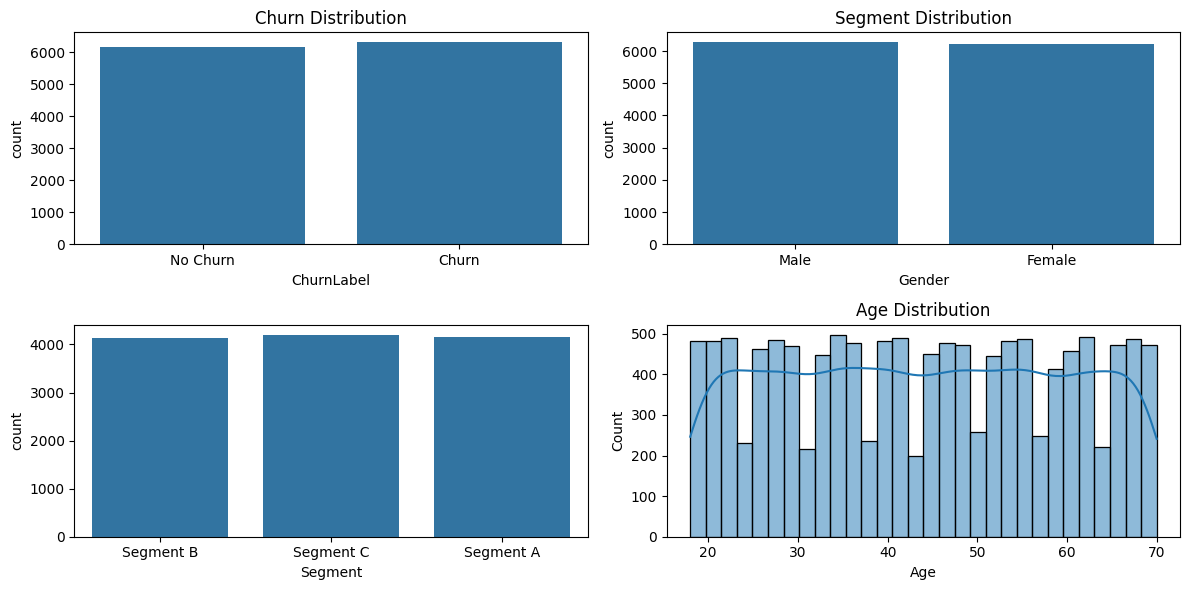

In [ ]:
#set up figure and axes
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
sns.countplot(x='ChurnLabel', data=df,ax =ax[0,0])
ax[0,0].set_title('Churn Distribution')
ax[0, 0].set_xticklabels(['No Churn', 'Churn'])


sns.countplot(x='Gender', data=df,ax =ax[0,1])
ax[0,1].set_title('Gender Distribution')

sns.countplot(x='Segment', data=df,ax =ax[1,0])
ax[0,1].set_title('Segment Distribution')

sns.histplot(x='Age', bins = 30 ,data=df,ax =ax[1,1], kde=True)
ax[1,1].set_title('Age Distribution')

plt.tight_layout()
plt.show()

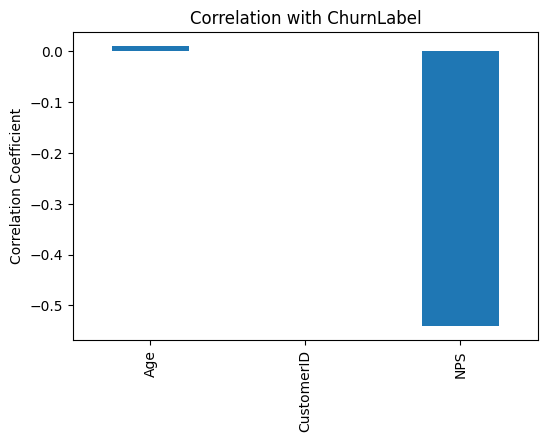

,ChurnLabel
ChurnLabel,1.000000
Age,0.010273
CustomerID,0.001530
NPS,-0.540703


In [ ]:
#correlation analysis
correlation = df.select_dtypes(include=[np.number]).corr()['ChurnLabel'].sort_values(ascending=False)
plt.figure(figsize=(6, 4))
correlation.drop('ChurnLabel').plot(kind='bar')
plt.title('Correlation with ChurnLabel')
plt.ylabel('Correlation Coefficient')
plt.show()

correlation

In [ ]:
#list out all nested columns
nested_columns = ['PurchaseHistory', 'SubscriptionDetails', 'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage', 'ClickstreamData', 'EngagementMetrics', 'Feedback', 'MarketingCommunication']
w1, w2 = 25, 1000
for col in nested_columns:
  row = [col, df[col][0]]
  print('\n| {:<{w1}} | {:<{w2}} |'.format(*row, w1=w1, w2=w2))


| PurchaseHistory           | [{'Product': 'Frozen Cocktail Mixes', 'Frequency': 8, 'Value': 884.43}, {'Product': 'Printer, Copier & Fax Machine Accessories', 'Frequency': 7, 'Value': 397.14}, {'Product': 'Hockey Stick Care', 'Frequency': 10, 'Value': 498.92}, {'Product': 'Guacamole', 'Frequency': 2, 'Value': 718.43}, {'Product': 'Mortisers', 'Frequency': 2, 'Value': 614.08}, {'Product': 'Rulers', 'Frequency': 6, 'Value': 221.68}, {'Product': 'Invitations', 'Frequency': 3, 'Value': 660.04}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

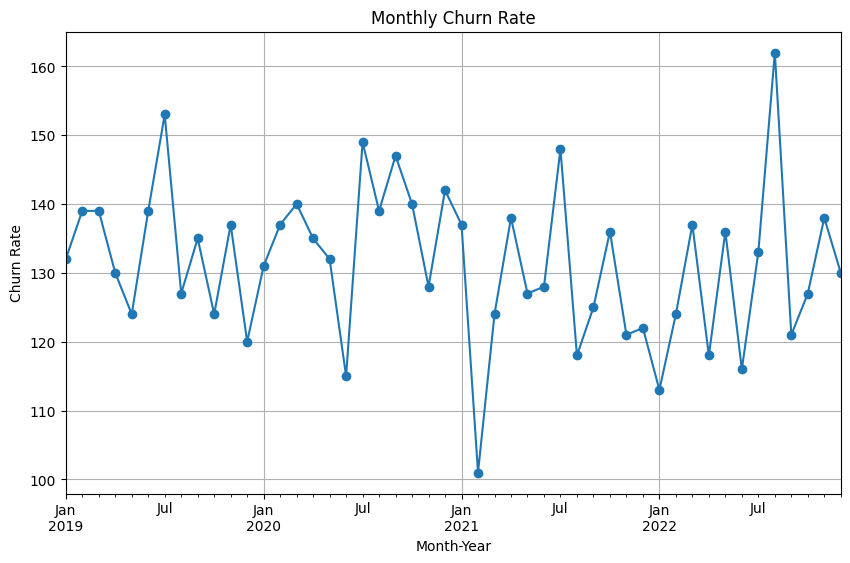

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['MonthYear'] = df['Timestamp'].dt.to_period('M')

#monthly churn rate
monthly_churn_rate = df.groupby('MonthYear')['ChurnLabel'].sum()
#churn over time
plt.figure(figsize=(10, 6))
monthly_churn_rate.plot(kind='line', marker='o')
plt.title('Monthly Churn Rate')
plt.xlabel('Month-Year')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.show()

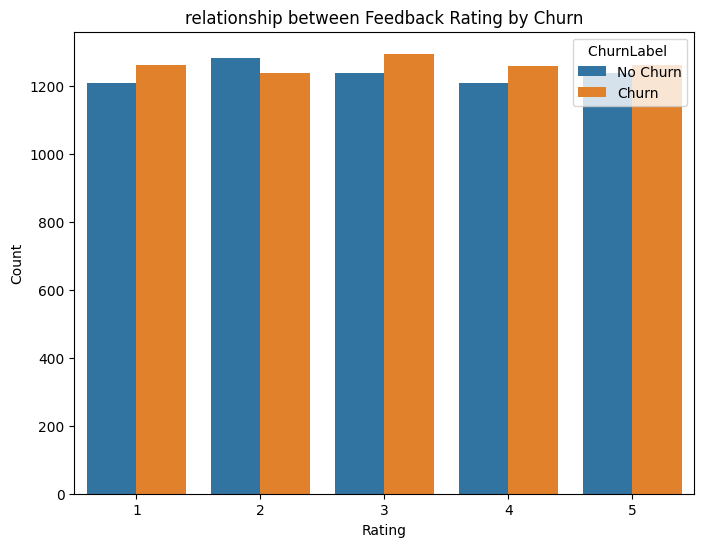

In [ ]:
#rate by churning
df['FeedbackRating'] = df['Feedback'].apply(lambda x: literal_eval(x)['Rating'] if isinstance(x, str) else None)

plt.figure(figsize=(8, 6))
sns.countplot(x='FeedbackRating', data=df, hue='ChurnLabel')
plt.title('relationship between Feedback Rating by Churn')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='ChurnLabel ', loc='upper right',labels=['No Churn', 'Churn'])
plt.show()

In [ ]:
### Data Preprocessing and Feature Engineering

In [ ]:
nested_columns = ['PurchaseHistory', 'SubscriptionDetails', 'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage', 'ClickstreamData', 'EngagementMetrics', 'Feedback', 'MarketingCommunication']


In [ ]:
for feature in nested_columns:
  df[feature] = df[feature].apply(literal_eval)

In [ ]:
df['PurchasedProducts'] = df['PurchaseHistory'].apply(lambda x: '|'.join([i['Product'] for i in x]))
df['PurchaseFrequency'] = df['PurchaseHistory'].apply(lambda x: sum([i['Frequency'] for i in x]))
df['TotalPurchaseValue'] = df['PurchaseHistory'].apply(lambda x: sum([i['Value'] for i in x]))

In [ ]:
df['SubscriptionPlan'] = df['SubscriptionDetails'].apply(lambda x: x['Plan'])
df['SubscriptionStartDate'] = df['SubscriptionDetails'].apply(lambda x: x['Start_Date'])
df['SubscriptionEndDate'] = df['SubscriptionDetails'].apply(lambda x: x['End_Date'])
df['SubscriptionDuration'] = (pd.to_datetime(df['SubscriptionEndDate']) - pd.to_datetime(df['SubscriptionStartDate'])).dt.days

In [ ]:
df['WebsitePageViews'] = df['WebsiteUsage'].apply(lambda x: x['PageViews'])
df['WebsiteDuration'] = df['WebsiteUsage'].apply(lambda x: x['TimeSpent(minutes)'])

df['EngagementMetricsLogins'] = df['EngagementMetrics'].apply(lambda x: x['Logins'])
df['EngagementMetricsFrequency'] = df['EngagementMetrics'].apply(lambda x: x['Frequency'])

df['FeedbackRating'] = df['Feedback'].apply(lambda x: x['Rating'])
df['FeedbackComments'] = df['Feedback'].apply(lambda x: x['Comment'])

df['MarketingCommunicationNoOfEmails'] = df['MarketingCommunication'].apply(lambda x: len(x))
df['MarketingCommunicationOpenClickDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Clicked']) - pd.to_datetime(i['Email_Opened'])).days for i in x
    ])
)
df['MarketingCommunicationSentClickDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Opened']) - pd.to_datetime(i['Email_Sent'])).days for i in x
    ])
)

In [ ]:
#Get all unique service interaction Type
service_interaction_types = df['ServiceInteractions'].apply(lambda x: list(set([i['Type'] for i in x])))
service_interaction_types = service_interaction_types.to_list()
unique_service_interactions = []
for i in service_interaction_types:
  unique_service_interactions.extend(i)
unique_service_interactions = list(set(unique_service_interactions))
print('All unique Service Interaction Types:',unique_service_interactions)

All unique Service Interaction Types: ['Chat', 'Call', 'Email']


In [ ]:
#Get all unique paymenthistory 'Method'
payment_history_methods = df['PaymentHistory'].apply(lambda x: list(set([i['Method'] for i in x])))
payment_history_methods = payment_history_methods .to_list()
unique_Payment_history_methods = []
for i in payment_history_methods :
  unique_Payment_history_methods.extend(i)
unique_Payment_history_methods = list(set(unique_Payment_history_methods))
print('All unique Service Interaction Types:',unique_Payment_history_methods)

All unique Service Interaction Types: ['PayPal', 'Credit Card', 'Bank Transfer']


In [ ]:
#get all clickstreamdata 'Action'
clickstream_actions = df['ClickstreamData'].apply(lambda x: list(set([i['Action'] for i in x])))
clickstream_actions = clickstream_actions.to_list()
unique_clickstream_actions = []
for i in clickstream_actions:
  unique_clickstream_actions.extend(i)
unique_clickstream_actions = list(set(unique_clickstream_actions))
print('All unique Clickstream Actions:',unique_clickstream_actions)


All unique Clickstream Actions: ['Search', 'Add to Cart', 'Click']


In [ ]:
#serviceinteraction
for interaction in unique_service_interactions:
  df[f'ServiceInteraction_{interaction}'] = df['ServiceInteractions'].apply(lambda x: len([i for i in x if i['Type'] == interaction]))

#PaymentHistory
df['PaymentHistoryNoOfLatePayments'] = df['PaymentHistory'].apply(lambda x: sum(i['Late_Payments'] for i in x))
df['PaymentHistoryAvgNoOfLatePayments'] = df['PaymentHistory'].apply(lambda x: np.mean([i['Late_Payments'] for i in x]))


#ClickstreamData
for action in unique_clickstream_actions:
  df[f'ClickstreamData_{action}'] = df['ClickstreamData'].apply(lambda x: len([i for i in x if i['Action'] == action]))

In [ ]:
df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentClickDiff,ServiceInteraction_Chat,ServiceInteraction_Call,ServiceInteraction_Email,PaymentHistoryNoOfLatePayments,PaymentHistoryAvgNoOfLatePayments,ClickstreamData_Search,ClickstreamData_Add to Cart,ClickstreamData_Click
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,319.0,818.0,2,1,1,40,13.333333,12,8,4
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,88.0,110.0,4,5,10,10,3.333333,7,8,9
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,117.0,333.0,1,1,1,8,2.666667,7,2,3
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,423.0,159.0,24,17,18,79,26.333333,16,15,16
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,96.0,193.0,1,4,5,2,0.666667,4,17,9


In [ ]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp', 'MonthYear',
       'FeedbackRating', 'PurchasedProducts', 'PurchaseFrequency',
       'TotalPurchaseValue', 'SubscriptionPlan', 'SubscriptionStartDate',
       'SubscriptionEndDate', 'SubscriptionDuration', 'WebsitePageViews',
       'WebsiteDuration', 'EngagementMetricsLogins',
       'EngagementMetricsFrequency', 'FeedbackComments',
       'MarketingCommunicationNoOfEmails',
       'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationSentClickDiff', 'ServiceInteraction_Chat',
       'ServiceInteraction_Call', 'ServiceInteraction_Email',
       'PaymentHistoryNoOfLatePayments', 'PaymentHistoryAvgNoOfLatePayments',
       'ClickstreamData

In [ ]:
#Pick out necessary column

In [ ]:
df1 = df[[
    'Age', 'Gender', 'NPS', 'ChurnLabel', 'PurchaseFrequency', 'TotalPurchaseValue', 'SubscriptionPlan', 'WebsitePageViews',
    'WebsiteDuration', 'EngagementMetricsLogins',
       'EngagementMetricsFrequency', 'FeedbackRating', 'MarketingCommunicationNoOfEmails',
       'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationSentClickDiff',  'ServiceInteraction_Chat',
       'ServiceInteraction_Email', 'ServiceInteraction_Call', 'PaymentHistoryNoOfLatePayments', 'ClickstreamData_Search', 'ClickstreamData_Click',
       'ClickstreamData_Add to Cart' ,'SubscriptionDuration']]
df1.head()

,Age,Gender,NPS,ChurnLabel,PurchaseFrequency,TotalPurchaseValue,SubscriptionPlan,WebsitePageViews,WebsiteDuration,EngagementMetricsLogins,...,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentClickDiff,ServiceInteraction_Chat,ServiceInteraction_Email,ServiceInteraction_Call,PaymentHistoryNoOfLatePayments,ClickstreamData_Search,ClickstreamData_Click,ClickstreamData_Add to Cart,SubscriptionDuration
0,31,Male,3,1,38,3994.72,Express,49,15,19,...,319.0,818.0,2,1,1,40,12,4,8,871
1,66,Female,6,0,4,2844.35,Pro,100,9,9,...,88.0,110.0,4,10,5,10,7,9,8,290
2,36,Female,3,0,14,1866.52,Essential,1,97,19,...,117.0,333.0,1,1,1,8,7,3,2,319
3,62,Female,1,1,28,1378.64,Smart,25,31,4,...,423.0,159.0,24,18,17,79,16,16,15,803
4,68,Female,3,0,39,2425.05,Basic,77,51,12,...,96.0,193.0,1,5,4,2,4,9,17,580


In [ ]:
df1.loc[0]

,0
Age,31
Gender,Male
NPS,3
ChurnLabel,1
PurchaseFrequency,38
TotalPurchaseValue,3994.72
SubscriptionPlan,Express
WebsitePageViews,49
WebsiteDuration,15
EngagementMetricsLogins,19


In [ ]:
print('total data lenght:', len(df1))
df1[['Gender', 'SubscriptionPlan', 'EngagementMetricsFrequency']].nunique()

total data lenght: 12483


,0
Gender,2
SubscriptionPlan,20
EngagementMetricsFrequency,3


In [ ]:
#Gender encoding to 0 and 1
gender_encode = {'Male':0,'Female':1}

#Subplans encoding
unique_subplans = df1['SubscriptionPlan'].unique()
subplan_map = {unique_subplans[i]: i for i in range(len(unique_subplans))}

#EngagementMetrics
unique_engagement_metrics = df1['EngagementMetricsFrequency'].unique()
engagement_map = {unique_engagement_metrics[i]: i for i in range(len(unique_engagement_metrics))}


#encode
df1.loc[:, 'Gender'] = df1.loc[:, 'Gender'].map(gender_encode)
df1.loc[:, 'SubscriptionPlan'] = df1.loc[:, 'SubscriptionPlan'].map(subplan_map)
df1.loc[:, 'EngagementMetricsFrequency'] = df1.loc[:, 'EngagementMetricsFrequency'].map(engagement_map)

In [ ]:
df1.loc[0]

,0
Age,31
Gender,0
NPS,3
ChurnLabel,1
PurchaseFrequency,38
TotalPurchaseValue,3994.72
SubscriptionPlan,0
WebsitePageViews,49
WebsiteDuration,15
EngagementMetricsLogins,19


Text(0.5, 1.0, 'Correlation Matrix')

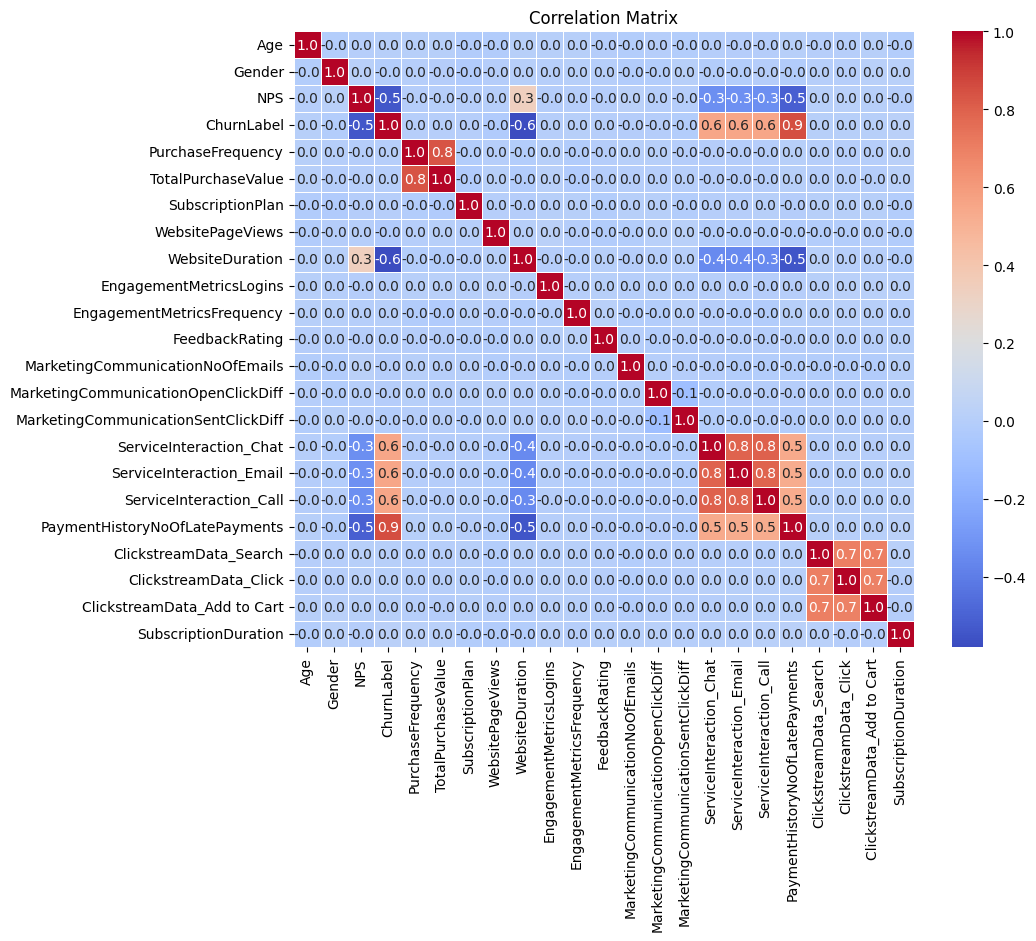

In [ ]:
#plot correlation matrix

df1_corr = df1.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df1_corr, annot=True, fmt='.1f',cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')

In [ ]:
#slipt data into train, test and validation
X = df1.drop(columns='ChurnLabel')
y = df1['ChurnLabel']

X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.8, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_other, y_other, test_size=0.3, random_state=42)

In [ ]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
X_val = ss.transform(X_val)

In [ ]:
#Modelling LogisticRegression, DecisionTreeClassifier. Merics: Accuraccy, precision score, recall score, f1 score

In [ ]:
def evaluate(X, y, model, subset=''):
  y_pred = model.predict(X)

  print(f'(subset) Accuracy: {accuracy_score(y_pred, y)}')
  print(f'(subset) Precision: {precision_score(y_pred, y)}')
  print(f'(subset) Recall: {recall_score(y_pred, y)}')
  print(f'(subset) F1 Score: {f1_score(y_pred, y)}')



In [ ]:
#Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

evaluate(X_train, y_train, lr, 'Train')
#
evaluate(X_val, y_val, lr, 'Validation')

(subset) Accuracy: 0.9723557692307693
(subset) Precision: 0.9696485623003195
(subset) Recall: 0.9751004016064257
(subset) F1 Score: 0.9723668402082499
(subset) Accuracy: 0.968968968968969
(subset) Precision: 0.9629629629629629
(subset) Recall: 0.9762845849802372
(subset) F1 Score: 0.9695780176643768


In [ ]:
#Decision Tree

In [ ]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

evaluate(X_train, y_train, dt, subset='Train')
print('..')
evaluate(X_val, y_val, dt, subset='Validation')

(subset) Accuracy: 0.9811698717948718
(subset) Precision: 0.9832268370607029
(subset) Recall: 0.979315831344471
(subset) F1 Score: 0.9812674372259864
..
(subset) Accuracy: 0.9726393059726393
(subset) Precision: 0.9733593242365172
(subset) Recall: 0.9733593242365172
(subset) F1 Score: 0.9733593242365172


In [ ]:
#Evalution on test set

In [ ]:
evaluate(X_test, y_test, lr, 'Logistic Regression')
print('..')
evaluate(X_test, y_test, dt, 'Decision Tree')

(subset) Accuracy: 0.9676680972818312
(subset) Precision: 0.9599772920806131
(subset) Recall: 0.9754831266224402
(subset) F1 Score: 0.9676680972818312
..
(subset) Accuracy: 0.9699570815450643
(subset) Precision: 0.9684927618506954
(subset) Recall: 0.9718029051552264
(subset) F1 Score: 0.9701450099516633


In [ ]:
#confusion matrix

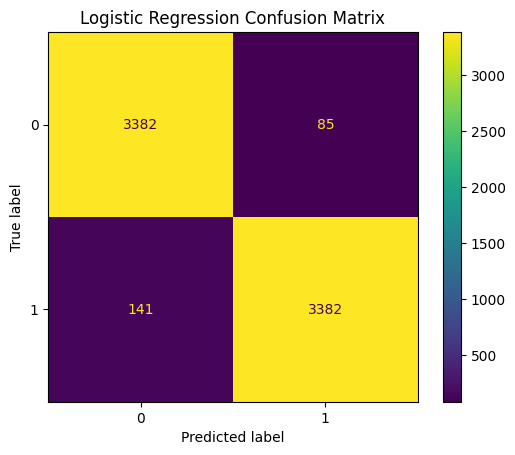

In [ ]:
lr_y_pred = lr.predict(X_test)
logistic_matrix = confusion_matrix(y_test, lr_y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=logistic_matrix)
display.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()

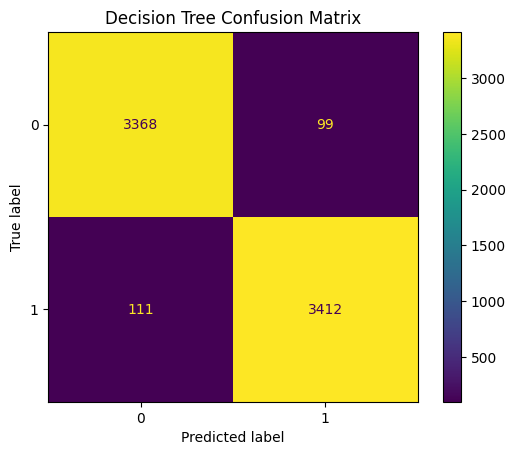

In [ ]:
dt_y_pred = dt.predict(X_test)
decision_tree_matrix = confusion_matrix(y_test, dt_y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=decision_tree_matrix)
display.plot()
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [ ]:
# prompt: create a project excerpt for this work

print("""
Project Title: Customer Churn Prediction

Problem Statement:
Customer churn is a critical issue for businesses as acquiring new customers is often more expensive than retaining existing ones. This project aims to build a predictive model to identify customers who are likely to churn, enabling proactive interventions to improve customer retention.

Methodology:

1.  **Data Loading and Exploration:** Loaded customer data from an Excel file and performed initial data exploration to understand the dataset structure, check for missing values and duplicates, and analyze descriptive statistics.
2.  **Exploratory Data Analysis (EDA):**
    *   Visualized the distribution of the target variable (ChurnLabel) and other key features like Gender, Segment, and Age.
    *   Analyzed the correlation of numerical features with the ChurnLabel to identify potential predictors.
    *   Investigated nested data structures within the dataset (e.g., PurchaseHistory, ServiceInteractions) and planned for feature extraction.
    *   Analyzed churn trends over time by visualizing monthly churn rates.
    *   Explored the relationship between customer feedback ratings and churn.
3.  **Data Preprocessing and Feature Engineering:**
    *   Extracted relevant features from the nested columns, such as total purchase value, subscription duration, website usage metrics, engagement metrics, feedback rating, and marketing communication statistics.
    *   Engineered new features like purchase frequency and average late payments.
    *   Identified unique values within categorical nested features (Service Interaction Types, Payment History Methods, Clickstream Actions) to guide feature creation.
    *   Created one-hot encoded or count-based features for the extracted categorical information from nested columns.
    *   Selected a subset of the most relevant features for modeling based on initial analysis.
    *   Encoded categorical features (Gender, SubscriptionPlan, EngagementMetricsFrequency) into numerical representations.
4.  **Correlation Analysis:** Visualized the correlation matrix of the selected features to understand relationships between variables and with the target variable.
5.  **Data Splitting and Scaling:** Split the data into training, validation, and testing sets to ensure robust model evaluation. Applied StandardScaler to standardize numerical features, which is often necessary for distance-based algorithms.
6.  **Model Building and Evaluation:**
    *   Implemented two classification models: Logistic Regression and Decision Tree Classifier.
    *   Trained the models on the training data.
    *   Evaluated the performance of both models on the validation set using key metrics: Accuracy, Precision, Recall, and F1 Score.
    *   Performed final evaluation on the unseen test set to assess the models' generalization capabilities.
    *   Generated and visualized confusion matrices for both models on the test set to understand their prediction performance for each class (churn/no churn).

Key Findings/Results:
- Initial EDA provided insights into customer demographics, behavior, and churn patterns.
- Correlation analysis highlighted potential predictors of churn.
- Feature engineering successfully extracted valuable information from nested data.
- Both Logistic Regression and Decision Tree models were built and evaluated.
- Evaluation metrics and confusion matrices on the test set provide a quantitative assessment of each model's performance in predicting customer churn. (Specific performance metrics are provided in the output of the script).

Future Work:
- Explore other classification algorithms (e.g., Random Forest, Gradient Boosting, Support Vector Machines).
- Perform hyperparameter tuning to optimize model performance.
- Investigate feature importance to identify the most impactful factors driving churn.
- Consider techniques for handling imbalanced datasets if necessary.
- Deploy the best-performing model for real-time churn prediction.
""")



Project Title: Customer Churn Prediction

Problem Statement:
Customer churn is a critical issue for businesses as acquiring new customers is often more expensive than retaining existing ones. This project aims to build a predictive model to identify customers who are likely to churn, enabling proactive interventions to improve customer retention.

Methodology:

1.  **Data Loading and Exploration:** Loaded customer data from an Excel file and performed initial data exploration to understand the dataset structure, check for missing values and duplicates, and analyze descriptive statistics.
2.  **Exploratory Data Analysis (EDA):**
    *   Visualized the distribution of the target variable (ChurnLabel) and other key features like Gender, Segment, and Age.
    *   Analyzed the correlation of numerical features with the ChurnLabel to identify potential predictors.
    *   Investigated nested data structures within the dataset (e.g., PurchaseHistory, ServiceInteractions) and planned for feat